# IPL Score Prediction using Machine Learning

This Machine Learning model adapts a Regression Approach to predict the score of the First Inning of an IPL Match.

# Import Necessary Libraries

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Load the dataset

In [2]:
#Importing dataset
ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


# Exploratory Data Analysis

In [3]:
# First 5 Columns Data
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# Describing the ipl_dfset
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
# Number of Unique Values in each column
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [7]:
# ipl_df types of all Columns
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

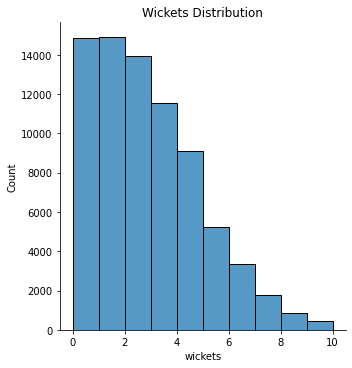

In [8]:
#Wickets Distribution
sns.displot(ipl_df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

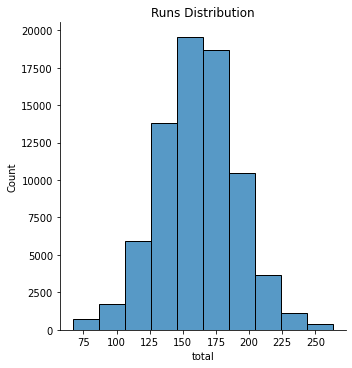

In [9]:
#Runs Distribution
sns.displot(ipl_df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

# Data Cleaning

#### Removing Irrelevant Data colunms

In [10]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [11]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams 


In [12]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [13]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [14]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


Plotting a Correlation Matrix of current data

C:\Users\rajes\AppData\Local\Temp\ipykernel_27264\2633840320.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=ipl_df.corr(), annot=True)


<AxesSubplot: >

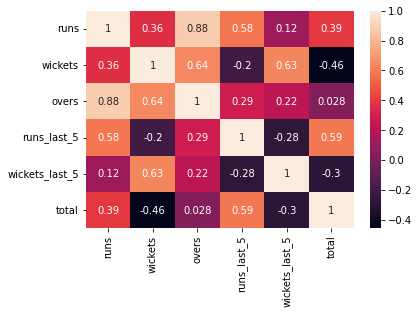

In [15]:
from seaborn import heatmap
heatmap(data=ipl_df.corr(), annot=True)

# Data Preprocessing and Encoding

#### Performing Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


#### Performing One Hot Encoding and Column Transformation

In [17]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [18]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

Save the Numpy Array in a new DataFrame with transformed columns

In [19]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [20]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

## Prepare Train and Test Data

In [21]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [22]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


## ML  Algorithms

In [23]:
models = dict()

#### 1. Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [25]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 85.14%


In [26]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 4.052792321116929
Mean Squared Error (MSE): 133.41725878833208
Root Mean Squared Error (RMSE): 11.550638890915605


#### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [28]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 66.52%
Test Score : 63.53%


In [29]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.449052535337392
Mean Squared Error (MSE): 327.5109095503303
Root Mean Squared Error (RMSE): 18.09726248774467


#### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [31]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.05%
Test Score : 93.10%


In [32]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.5327007841531035
Mean Squared Error (MSE): 61.942673944315615
Root Mean Squared Error (RMSE): 7.870366823999731


#### Support Vector Machine

In [33]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [34]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 58.10%
Test Score : 54.68%


In [35]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 15.138576543765225
Mean Squared Error (MSE): 407.0129022642375
Root Mean Squared Error (RMSE): 20.17456077004497


#### XGBoost

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 88.60%
Test Score : 84.54%


In [38]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.457488751179618
Mean Squared Error (MSE): 138.80096866699935
Root Mean Squared Error (RMSE): 11.7813822901644


KNR

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [40]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.86182996758913
Mean Squared Error (MSE): 200.2784642233857
Root Mean Squared Error (RMSE): 14.151977396229324


## Best Model 

<BarContainer object of 5 artists>

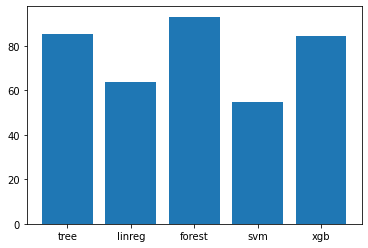

In [41]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

# Predictions

In [42]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [43]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 148 || Actual Score : 147


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [44]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 186 || Actual Score : 176


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [45]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 184 || Actual Score : 185


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [46]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 175 || Actual Score : 172


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5 
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [47]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 109 || Actual Score : 110


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 6
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [48]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 147 || Actual Score : 153


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 7
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

In [49]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 155 || Actual Score : 146


C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

In [50]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def evaluate_regression_models(X, y, test_size=0.3, random_state=42):
    """
    Evaluates multiple regression models on a given dataset.

    Args:
        X (array-like): The input features.
        y (array-like): The target labels.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): The random seed for reproducibility.

    Returns:
        A dictionary containing the evaluation metrics for each model.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the regression models to evaluate
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'ElasticNet': ElasticNet(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Support Vector Machine': SVR(),
        'Linear Support Vector Machine': LinearSVR(),
        'XGBoost': XGBRegressor(),
        'LightGBM': LGBMRegressor()
    }

    # Evaluate each model and store the results
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
            'Mean Squared Error': mean_squared_error(y_test, y_pred),
            'R2 Score': r2_score(y_test, y_pred)
        }

    return results


In [53]:
df

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,106.0,9.0,18.1,29.0,4.0,107.0
40104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,107.0,9.0,18.2,29.0,4.0,107.0
40105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,107.0,9.0,18.3,28.0,4.0,107.0
40106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,107.0,9.0,18.4,24.0,4.0,107.0


In [55]:
%whos

Variable                     Type                     Data/Info
---------------------------------------------------------------
AdaBoostRegressor            ABCMeta                  <class 'sklearn.ensemble.<...>sting.AdaBoostRegressor'>
ColumnTransformer            ABCMeta                  <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
DecisionTreeRegressor        ABCMeta                  <class 'sklearn.tree._cla<...>s.DecisionTreeRegressor'>
ElasticNet                   ABCMeta                  <class 'sklearn.linear_mo<...>nate_descent.ElasticNet'>
GradientBoostingRegressor    ABCMeta                  <class 'sklearn.ensemble.<...>adientBoostingRegressor'>
KNeighborsRegressor          ABCMeta                  <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
LGBMRegressor                type                     <class 'lightgbm.sklearn.LGBMRegressor'>
LabelEncoder                 type                     <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Lasso  

In [57]:
models_scores =evaluate_regression_models(features,labels,test_size=0.25,random_state=23)

C:\Users\rajes\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [61]:
models=pd.DataFrame(models_scores).T

In [62]:
models

,Mean Absolute Error,Mean Squared Error,R2 Score
Linear Regression,13.198473,308.325733,0.660585
Lasso,13.265596,319.419061,0.648373
Ridge,13.198915,308.242328,0.660677
ElasticNet,13.321596,322.954221,0.644481
Decision Tree,4.176723,129.671736,0.857253
Random Forest,4.686372,63.804248,0.929762
Gradient Boosting,12.602129,284.291485,0.687043
AdaBoost,16.805116,451.082870,0.503433
Support Vector Machine,14.990638,391.763090,0.568734
Linear Support Vector Machine,13.760979,338.423621,0.627452
